In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
#import re
#regex = re.compile(r"\[|\]|<", re.IGNORECASE)
warnings.filterwarnings("ignore")

In [2]:
#churn_df = pd.read_csv('http://amunategui.github.io/customer_churn.csv')
churn_df = pd.read_csv("/Users/harshil/Desktop/customer_churn.csv")
#churn_df = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in churn_df.values]
churn_df.head()

,State,AccountLength,AreaCode,Phone,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# Binarize area codes
churn_df['AreaCode'] = churn_df['AreaCode'].apply(int)
dummy_areacode = pd.get_dummies(churn_df['AreaCode'], prefix = 'Areacode')
dummy_areacode.head()


,Areacode_408,Areacode_415,Areacode_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [4]:
churn_df['State'].value_counts()[0:10]
#churn_df['State'].value_counts()[0:10]

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
Name: State, dtype: int64

In [5]:
# fix the outcome
churn_df['Churn'] = np.where(churn_df['Churn'] == 'True.', 1, 0)
churn_df["Interntional_Plan"] = np.where(churn_df["Interntional_Plan"] == 'yes', 1, 0)
churn_df['Vmail_Plan'] = np.where(churn_df['Vmail_Plan'] == 'yes', 1, 0)

In [6]:
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [7]:
# dummify states
pd.get_dummies(churn_df['State']).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# binarize categorical columns



churn_df = pd.concat([churn_df, pd.get_dummies(churn_df['State'])], axis=1)
churn_df = pd.concat([churn_df, dummy_areacode], axis=1)

churn_df.head()

,State,AccountLength,AreaCode,Phone,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,...,UT,VA,VT,WA,WI,WV,WY,Areacode_408,Areacode_415,Areacode_510
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,0,0,0,0,0,0,0,0,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,0,0,0,0,0,0,0,0,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,0,0,0,0,0,0,0,0,1,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,0,0,0,0,0,0,0,1,0,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# # check for nulls in data and impute if necessary
# for feat in list(churn_df):
#     if (len(churn_df[feat]) - churn_df[feat].count()) > 0:
#         print(feat)
#         print(len(churn_df[feat]) - churn_df[feat].count())
#         # tmp_df.loc[tmp_df[feat].isnull(), feat] = 0

In [10]:
list(churn_df)
#print(churn_df)

['State',
 'AccountLength',
 'AreaCode',
 'Phone',
 'Interntional_Plan',
 'Vmail_Plan',
 'Vmail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'Intl_Mins',
 'Intl_Calls',
 'Intl_Charge',
 'CustServ_Calls',
 'Churn',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'Areacode_408',
 'Areacode_415',
 'Areacode_510']

In [11]:
# dropping features after pivoting 
features = [feat for feat in list(churn_df) if feat not in ['State', 'Churn', 'Phone', 'AreaCode']]

In [12]:
outcome = 'Churn'

[0]	train-auc:0.830319	eval-auc:0.835823
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 500 rounds.
[50]	train-auc:0.91791	eval-auc:0.931318
[100]	train-auc:0.937508	eval-auc:0.934876
[150]	train-auc:0.953852	eval-auc:0.937022
[200]	train-auc:0.96516	eval-auc:0.937422
[250]	train-auc:0.973363	eval-auc:0.937708
[300]	train-auc:0.980095	eval-auc:0.936239
[350]	train-auc:0.985225	eval-auc:0.936394
[400]	train-auc:0.988877	eval-auc:0.936467
[450]	train-auc:0.991435	eval-auc:0.935276
[500]	train-auc:0.993991	eval-auc:0.933766
[550]	train-auc:0.995753	eval-auc:0.93273
[600]	train-auc:0.997183	eval-auc:0.932828
Stopping. Best iteration:
[135]	train-auc:0.948293	eval-auc:0.939046



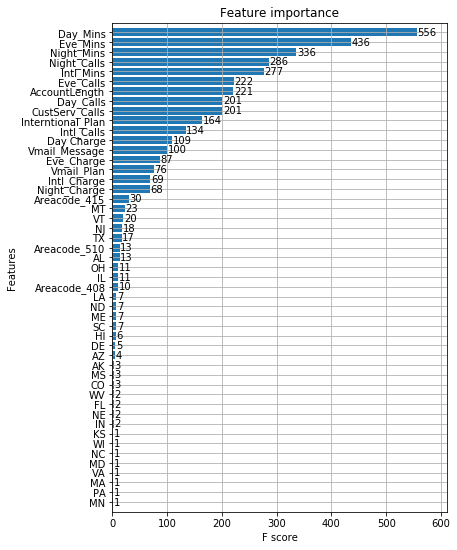

In [13]:
# run simple xgboost classification model and check 
# prep modeling code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(churn_df, 
                                                 churn_df[outcome], 
                                                 test_size=0.3, 

                                                    random_state=42)
import xgboost as xgb
xgb_params = {
    'max_depth':3, 
    'eta':0.05, 
    'silent':0, 
    'eval_metric':'auc',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'binary:logistic',
    'seed' : 0
}
dtrain = xgb.DMatrix(X_train[features], y_train, feature_names = features)
dtest = xgb.DMatrix(X_test[features], y_test, feature_names = features)
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train (params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 2000,
              verbose_eval=50, 
              early_stopping_rounds = 500,
              evals=evals,
              #feval = f1_score_cust,
              maximize = True)
# plot the important features  
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=0.8, ax=ax)
plt.show()

In [14]:
# get dataframe version of important feature for model 
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

,feature,importance
0,Day_Mins,556
4,Eve_Mins,436
12,Night_Mins,336
8,Night_Calls,286
9,Intl_Mins,277
17,Eve_Calls,222
16,AccountLength,221
1,CustServ_Calls,201
7,Day_Calls,201
2,Interntional_Plan,164


In [15]:
# Creating top/bottom percentiles to determine under/over use
churn_df['Day_Mins'].quantile(0.25)

143.7

In [16]:
churn_df['Day_Mins'].quantile(0.75)

216.4

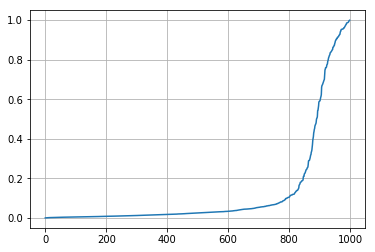

In [17]:
pred_churn = xgb_model.predict(dtest)
plt.plot(sorted(pred_churn))
plt.grid()

In [18]:
# get all numerical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = list(X_test.head().select_dtypes(include=numerics))
features_to_ignore = ['Account Length', 'Area Code','Churn?', 'Will_Churn']
numeric_features = [nf for nf in numeric_features if nf not in features_to_ignore]

row_counter = 0
X_test['Will_Churn'] = pred_churn
new_df = []
for index, row in X_test.iterrows():
    if row['Will_Churn'] > 0.8:
        row_counter += 1
        new_df.append(row[list(churn_df)])
        for feat in numeric_features:
            # only consider high prob churns
            if row[feat] < X_test[feat].quantile(0.25):
                print('(ID:', row_counter, ')', feat,  ' is < than 25 percentile')
            if row[feat] > X_test[feat].quantile(0.75):
                print('(ID:', row_counter, ')', feat,  ' is > than 75 percentile')


new_df[0]

(ID: 1 ) Day_Mins  is < than 25 percentile
(ID: 1 ) Day_Calls  is < than 25 percentile
(ID: 1 ) Day Charge  is < than 25 percentile
(ID: 1 ) Eve_Mins  is < than 25 percentile
(ID: 1 ) Eve_Calls  is > than 75 percentile
(ID: 1 ) Eve_Charge  is < than 25 percentile
(ID: 1 ) Night_Mins  is < than 25 percentile
(ID: 1 ) Night_Charge  is < than 25 percentile
(ID: 1 ) Intl_Mins  is < than 25 percentile
(ID: 1 ) Intl_Calls  is < than 25 percentile
(ID: 1 ) Intl_Charge  is < than 25 percentile
(ID: 1 ) CustServ_Calls  is > than 75 percentile
(ID: 1 ) Churn  is > than 75 percentile
(ID: 2 ) Day_Mins  is > than 75 percentile
(ID: 2 ) Day_Calls  is > than 75 percentile
(ID: 2 ) Day Charge  is > than 75 percentile
(ID: 2 ) Eve_Calls  is < than 25 percentile
(ID: 2 ) Night_Calls  is > than 75 percentile
(ID: 2 ) Intl_Mins  is < than 25 percentile
(ID: 2 ) Intl_Charge  is < than 25 percentile
(ID: 2 ) Churn  is > than 75 percentile
(ID: 3 ) AccountLength  is < than 25 percentile
(ID: 3 ) AreaCode  i

(ID: 21 ) AreaCode  is < than 25 percentile
(ID: 21 ) Day_Mins  is > than 75 percentile
(ID: 21 ) Day_Calls  is > than 75 percentile
(ID: 21 ) Day Charge  is > than 75 percentile
(ID: 21 ) Eve_Mins  is > than 75 percentile
(ID: 21 ) Eve_Charge  is > than 75 percentile
(ID: 21 ) Night_Mins  is > than 75 percentile
(ID: 21 ) Night_Charge  is > than 75 percentile
(ID: 21 ) Intl_Mins  is > than 75 percentile
(ID: 21 ) Intl_Calls  is > than 75 percentile
(ID: 21 ) Intl_Charge  is > than 75 percentile
(ID: 21 ) Churn  is > than 75 percentile
(ID: 22 ) AccountLength  is < than 25 percentile
(ID: 22 ) Day_Mins  is > than 75 percentile
(ID: 22 ) Day Charge  is > than 75 percentile
(ID: 22 ) Eve_Mins  is > than 75 percentile
(ID: 22 ) Eve_Charge  is > than 75 percentile
(ID: 22 ) Night_Mins  is > than 75 percentile
(ID: 22 ) Night_Charge  is > than 75 percentile
(ID: 22 ) Intl_Mins  is > than 75 percentile
(ID: 22 ) Intl_Calls  is > than 75 percentile
(ID: 22 ) Intl_Charge  is > than 75 percenti

(ID: 40 ) Intl_Charge  is > than 75 percentile
(ID: 40 ) CustServ_Calls  is < than 25 percentile
(ID: 40 ) Churn  is > than 75 percentile
(ID: 41 ) Interntional_Plan  is > than 75 percentile
(ID: 41 ) Day_Calls  is < than 25 percentile
(ID: 41 ) Eve_Calls  is < than 25 percentile
(ID: 41 ) Night_Mins  is < than 25 percentile
(ID: 41 ) Night_Charge  is < than 25 percentile
(ID: 41 ) Intl_Mins  is > than 75 percentile
(ID: 41 ) Intl_Charge  is > than 75 percentile
(ID: 41 ) CustServ_Calls  is > than 75 percentile
(ID: 41 ) Churn  is > than 75 percentile
(ID: 42 ) Day_Mins  is > than 75 percentile
(ID: 42 ) Day_Calls  is < than 25 percentile
(ID: 42 ) Day Charge  is > than 75 percentile
(ID: 42 ) Night_Mins  is > than 75 percentile
(ID: 42 ) Night_Calls  is > than 75 percentile
(ID: 42 ) Night_Charge  is > than 75 percentile
(ID: 42 ) Intl_Mins  is > than 75 percentile
(ID: 42 ) Intl_Calls  is > than 75 percentile
(ID: 42 ) Intl_Charge  is > than 75 percentile
(ID: 42 ) Churn  is > than 7

(ID: 61 ) Intl_Mins  is > than 75 percentile
(ID: 61 ) Intl_Charge  is > than 75 percentile
(ID: 61 ) Churn  is > than 75 percentile
(ID: 62 ) AccountLength  is > than 75 percentile
(ID: 62 ) Day_Mins  is > than 75 percentile
(ID: 62 ) Day_Calls  is < than 25 percentile
(ID: 62 ) Day Charge  is > than 75 percentile
(ID: 62 ) Night_Mins  is > than 75 percentile
(ID: 62 ) Night_Charge  is > than 75 percentile
(ID: 62 ) Intl_Calls  is > than 75 percentile
(ID: 62 ) Churn  is > than 75 percentile
(ID: 63 ) Day_Mins  is > than 75 percentile
(ID: 63 ) Day_Calls  is < than 25 percentile
(ID: 63 ) Day Charge  is > than 75 percentile
(ID: 63 ) Eve_Calls  is < than 25 percentile
(ID: 63 ) Night_Mins  is > than 75 percentile
(ID: 63 ) Night_Charge  is > than 75 percentile
(ID: 63 ) CustServ_Calls  is > than 75 percentile
(ID: 63 ) Churn  is > than 75 percentile
(ID: 64 ) Day_Mins  is > than 75 percentile
(ID: 64 ) Day_Calls  is < than 25 percentile
(ID: 64 ) Day Charge  is > than 75 percentile
(I

State                      SD
AccountLength              98
AreaCode                  415
Phone                392-2555
Interntional_Plan           0
                       ...   
WV                          0
WY                          0
Areacode_408                0
Areacode_415                1
Areacode_510                0
Name: 1345, Length: 75, dtype: object

In [19]:
# get all known not to churn
not_churn = X_train[X_train['Churn']==False].copy()

find_closet_df = []

# add row to find insights
find_closet_df.append(new_df[0])

for index, row in not_churn.iterrows():
    find_closet_df.append(row[list(churn_df)])
    
find_closet_df = pd.DataFrame(find_closet_df)
find_closet_df['ID'] = [idx for idx in range(1,len(find_closet_df)+1)]
find_closet_df.head()

,State,AccountLength,AreaCode,Phone,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,...,UT,VA,VT,WA,WI,WV,WY,Areacode_408,Areacode_415,Areacode_510
1345,SD,98,415,392-2555,0,0,0,0.0,0,0.00,...,0,0,0,0,0,0,0,0,1,0
2016,RI,80,510,332-8764,0,0,0,202.4,118,34.41,...,0,0,0,0,0,0,0,0,0,1
1362,WV,63,510,329-7102,0,0,0,132.9,122,22.59,...,0,0,0,0,0,1,0,0,0,1
2670,WY,116,510,392-2733,0,1,12,221.0,108,37.57,...,0,0,0,0,0,0,1,0,0,1
1846,NH,120,510,395-2579,0,1,43,177.9,117,30.24,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Find Closest Clusters to the Embedded Churn Risk
from sklearn.cluster import KMeans 
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(find_closet_df[features])
labels = kmeans.labels_
find_closet_df['clusters'] = labels
find_closet_df.tail()

,State,AccountLength,AreaCode,Phone,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,...,VA,VT,WA,WI,WV,WY,Areacode_408,Areacode_415,Areacode_510,clusters
1095,ID,106,510,383-2566,0,0,0,274.4,120,46.65,...,0,0,0,0,0,0,0,0,1,3
1130,PA,122,415,361-5225,0,0,0,35.1,62,5.97,...,0,0,0,0,0,0,0,1,0,3
1294,OR,66,408,348-7409,0,0,0,87.6,76,14.89,...,0,0,0,0,0,0,1,0,0,3
860,HI,169,415,334-3289,0,0,0,179.2,111,30.46,...,0,0,0,0,0,0,0,1,0,3
3174,SC,36,408,359-5091,0,1,43,29.9,123,5.08,...,0,0,0,0,0,0,1,0,0,3


In [21]:
# We compare the row with high-probability of churn against non-churns
find_closet_df[find_closet_df['clusters']==6][features]

,AccountLength,Interntional_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day Charge,Eve_Mins,Eve_Calls,Eve_Charge,...,UT,VA,VT,WA,WI,WV,WY,Areacode_408,Areacode_415,Areacode_510
1345,98,0,0,0,0.0,0,0.00,159.6,130,13.57,...,0,0,0,0,0,0,0,0,1,0
2016,80,0,0,0,202.4,118,34.41,260.2,67,22.12,...,0,0,0,0,0,0,0,0,0,1
1362,63,0,0,0,132.9,122,22.59,67.0,62,5.70,...,0,0,0,0,0,1,0,0,0,1
2670,116,0,1,12,221.0,108,37.57,151.0,118,12.84,...,0,0,0,0,0,0,1,0,0,1
1846,120,0,1,43,177.9,117,30.24,175.1,70,14.88,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,193,0,1,31,71.2,58,12.10,124.7,105,10.60,...,0,0,0,0,0,0,0,0,1,0
1628,131,0,0,0,110.9,74,18.85,115.6,90,9.83,...,0,0,0,0,0,0,1,0,0,1
49,97,0,1,24,133.2,135,22.64,217.2,58,18.46,...,0,0,0,0,0,0,1,0,1,0
1072,164,0,1,25,219.1,88,37.25,151.5,99,12.88,...,0,0,0,0,0,0,0,1,0,0


In [22]:
def risk_compare(cluster_df, cluster_number, var1, var2):
    mydat = find_closet_df.copy()
    mydat = mydat[mydat['clusters'] == cluster_number]
    mydat = mydat[[var1, var2, 'clusters']]
    # differentiate high-risk churn customer
    mydat.iat[0, 2] = 0

    sns.lmplot(var1, var2, data=mydat,
               fit_reg=False, hue="clusters", 
               scatter_kws={"marker": "D", "s": 100})

    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

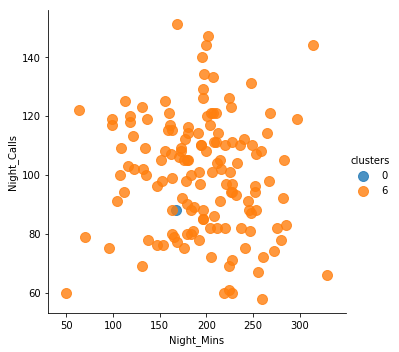

In [23]:
risk_compare(find_closet_df.copy(), 6, 'Night_Mins', 'Night_Calls')

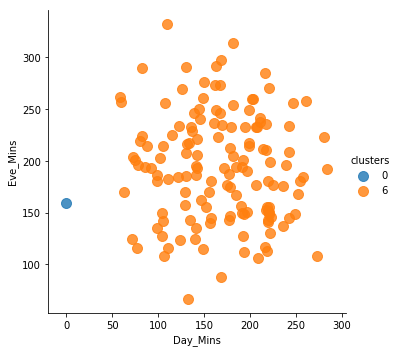

In [24]:
    
risk_compare(find_closet_df.copy(), 6, 'Day_Mins', 'Eve_Mins')